In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline            

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/wine.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: >

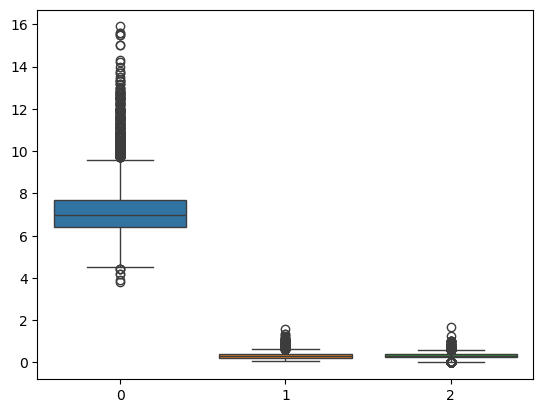

In [4]:
sns.boxplot(data.iloc[:,0:3])

In [5]:
data[12].value_counts()

12
0    4898
1    1599
Name: count, dtype: int64

In [6]:
X = data.drop(12, axis=1)
y = data[12]

In [7]:
from sklearn.preprocessing import RobustScaler

In [8]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled

array([[ 0.30769231,  2.41176471, -2.21428571, ...,  0.29411765,
        -0.5       , -1.        ],
       [ 0.61538462,  3.47058824, -2.21428571, ...,  1.        ,
        -0.27777778, -1.        ],
       [ 0.61538462,  2.76470588, -1.92857143, ...,  0.82352941,
        -0.27777778, -1.        ],
       ...,
       [-0.38461538, -0.29411765, -0.85714286, ..., -0.29411765,
        -0.5       ,  0.        ],
       [-1.15384615,  0.        , -0.07142857, ..., -0.76470588,
         1.38888889,  1.        ],
       [-0.76923077, -0.47058824,  0.5       , ..., -1.11764706,
         0.83333333,  0.        ]])

In [9]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

2024-09-11 09:22:06.282687: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 09:22:08.007247: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-11 09:22:08.007388: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-11 09:22:08.010898: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-11 09:22:08.558428: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [13]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


2024-09-11 09:22:08.866911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 09:22:08.868111: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-11 09:22:08.947804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:22:08.947851: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-11 09:22:08.947873: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_valid, y_valid))

Epoch 1/100


2024-09-11 09:22:09.656680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:22:09.717951: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:22:09.718012: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 1s 74ms/step - loss: 0.6707 - accuracy: 0.6193 - val_loss: 0.6526 - val_accuracy: 0.7475
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 0.6374 - accuracy: 0.8184 - val_loss: 0.6174 - val_accuracy: 0.8814
Epoch 3/100


2024-09-11 09:22:10.528176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:22:10.552993: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:22:10.553061: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 0s 16ms/step - loss: 0.5992 - accuracy: 0.9066 - val_loss: 0.5765 - val_accuracy: 0.9323
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.5558 - accuracy: 0.9438 - val_loss: 0.5309 - val_accuracy: 0.9546
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 0.5083 - accuracy: 0.9649 - val_loss: 0.4814 - val_accuracy: 0.9707
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 0.4568 - accuracy: 0.9767 - val_loss: 0.4286 - val_accuracy: 0.9769
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 0.4024 - accuracy: 0.9805 - val_loss: 0.3738 - val_accuracy: 0.9815
Epoch 8/100
8/8 [==============================] - 0s 15ms/step - loss: 0.3467 - accuracy: 0.9828 - val_loss: 0.3183 - val_accuracy: 0.9831
Epoch 9/100
8/8 [==============================] - 0s 16ms/step - loss: 0.2908 - accuracy: 0.9833 - val_loss: 0.2651 - val_accuracy: 0.9846
Epoch 10/100
8/8 [==============

In [15]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

41/41 [==============================] - 0s 4ms/step


2024-09-11 09:22:23.303143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:22:23.487750: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:22:23.487829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      0.98      0.99       320

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



2024-09-11 09:22:23.507540: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:22:23.507642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-11 09:22:23.513790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:22:23.513868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: 

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

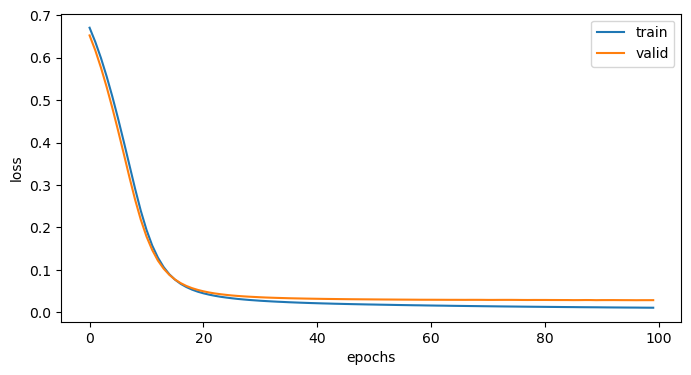

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# EarlyStopping으로 학습 조기 중단 및 저장하기

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

# ModelCheckpoint
* 모델을 중간에 저장하는 옵션

In [20]:
import os
if not os.path.exists("./model"):
    os.makedirs("./model")
    print(f"Directory /model created.")
else:
    print(f"Directory /model already exists.")

Directory /model already exists.


In [21]:
modelpath = "./model/{epoch:03d}--{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [22]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_valid, y_valid), 
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0105 - accuracy: 0.9979 - val_loss: 0.0286 - val_accuracy: 0.9962
Epoch 2/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.0104 - accuracy: 0.9982 - val_loss: 0.0285 - val_accuracy: 0.9962
Epoch 3/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.0104 - accuracy: 0.9982 - val_loss: 0.0284 - val_accuracy: 0.9962
Epoch 4/1000
8/8 [==============================] - 0s 21ms/step - loss: 0.0103 - accuracy: 0.9982 - val_loss: 0.0282 - val_accuracy: 0.9962
Epoch 5/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0102 - accuracy: 0.9982 - val_loss: 0.0283 - val_accuracy: 0.9962
Epoch 6/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.0284 - val_accuracy: 0.9962
Epoch 7/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.0284 - val_accuracy: 0.9962
Epoch 8/1000


Epoch 59/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0279 - val_accuracy: 0.9954
Epoch 60/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0279 - val_accuracy: 0.9954
Epoch 61/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 0.0280 - val_accuracy: 0.9954
Epoch 62/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 0.0281 - val_accuracy: 0.9954
Epoch 63/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0280 - val_accuracy: 0.9954
Epoch 64/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0280 - val_accuracy: 0.9954
Epoch 65/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0280 - val_accuracy: 0.9954
Epoch 

# 저장된 베스트 모델을 불러와서 테스트 하기

In [23]:
from tensorflow.keras.models import load_model

In [24]:
best_model = load_model("./model/076--0.0278.keras")  # .h5

인공지능 서비스 만들어서 베포한다고할때 만들어진 모델 가져다가 사용한다는것.
만들어진 모델 파일 저장하고 다른사람들에게 보내주면 다른 곳에서도 불러와서 사용할 수 있음

In [25]:
best_pred = best_model.predict(X_test)
best_pred = pd.DataFrame(best_pred)
best_pred = best_pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, best_pred))

41/41 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.98      0.99       320

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



2024-09-11 09:23:18.287858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


=============================================================================================================

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
wine = pd.read_csv("../06_machine_learning/data/winequality-white.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

클래스 많아질수록 예측력은 낮아진다
(이진분류는 90퍼 이상 나옴) 
성능 50퍼밖에 안나온다고 좌절할 필요 없다

In [30]:
wine['quality'].nunique()

7

In [31]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

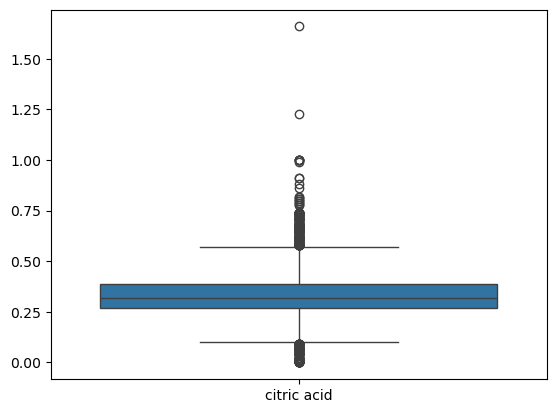

In [32]:
sns.boxplot(wine.iloc[:,2:3])

In [33]:
from sklearn.preprocessing import RobustScaler

In [34]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

In [35]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [36]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [37]:
rbs = RobustScaler()
X_scaled = rbs.fit_transform(X)


In [38]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [41]:
print(X_train.shape, X_valid.shape, X_test.shape)

(2938, 11) (980, 11) (980, 11)


In [42]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [43]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 7)                 119       
                                                                 
Total params: 5,223
Trainable params: 5,223
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=200) 
filepath = "./model/white_wine{epoch:04d}__{val_loss:.4f}.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model.fit(X_train, y_train, epochs=10000, batch_size=500, validation_data=(X_valid, y_valid),
                   callbacks=[early_stop, model_save])

Epoch 1/10000


2024-09-11 09:26:58.844828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:26:58.895592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:26:58.895651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 1s 57ms/step - loss: 1.8798 - accuracy: 0.3264 - val_loss: 1.8169 - val_accuracy: 0.4020
Epoch 2/10000
6/6 [==============================] - ETA: 0s - loss: 1.7746 - accuracy: 0.4112

2024-09-11 09:26:59.302707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:26:59.328595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:26:59.328680: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 0s 33ms/step - loss: 1.7746 - accuracy: 0.4112 - val_loss: 1.7087 - val_accuracy: 0.4316
Epoch 3/10000
6/6 [==============================] - 0s 32ms/step - loss: 1.6644 - accuracy: 0.4370 - val_loss: 1.5924 - val_accuracy: 0.4500
Epoch 4/10000
6/6 [==============================] - 0s 30ms/step - loss: 1.5530 - accuracy: 0.4455 - val_loss: 1.4828 - val_accuracy: 0.4480
Epoch 5/10000
6/6 [==============================] - 0s 36ms/step - loss: 1.4554 - accuracy: 0.4503 - val_loss: 1.3974 - val_accuracy: 0.4490
Epoch 6/10000
6/6 [==============================] - 0s 30ms/step - loss: 1.3746 - accuracy: 0.4541 - val_loss: 1.3359 - val_accuracy: 0.4673
Epoch 7/10000
6/6 [==============================] - 0s 30ms/step - loss: 1.3184 - accuracy: 0.4803 - val_loss: 1.2988 - val_accuracy: 0.4929
Epoch 8/10000
6/6 [==============================] - 0s 31ms/step - loss: 1.2814 - accuracy: 0.4983 - val_loss: 1.2745 - val_accuracy: 0.5041
Epoch 9/10000
6/6 [=

6/6 [==============================] - 0s 21ms/step - loss: 0.8036 - accuracy: 0.6767 - val_loss: 1.0657 - val_accuracy: 0.5531
Epoch 117/10000
6/6 [==============================] - 0s 22ms/step - loss: 0.7970 - accuracy: 0.6746 - val_loss: 1.0669 - val_accuracy: 0.5510
Epoch 118/10000
6/6 [==============================] - 0s 24ms/step - loss: 0.7955 - accuracy: 0.6821 - val_loss: 1.0679 - val_accuracy: 0.5490
Epoch 119/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.7927 - accuracy: 0.6756 - val_loss: 1.0665 - val_accuracy: 0.5561
Epoch 120/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.7922 - accuracy: 0.6811 - val_loss: 1.0678 - val_accuracy: 0.5551
Epoch 121/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.7912 - accuracy: 0.6804 - val_loss: 1.0720 - val_accuracy: 0.5551
Epoch 122/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.7872 - accuracy: 0.6818 - val_loss: 1.0718 - val_accuracy: 0.5582
Epoch 12

6/6 [==============================] - 0s 20ms/step - loss: 0.6822 - accuracy: 0.7274 - val_loss: 1.1318 - val_accuracy: 0.5776
Epoch 174/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.6770 - accuracy: 0.7314 - val_loss: 1.1334 - val_accuracy: 0.5837
Epoch 175/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.6767 - accuracy: 0.7314 - val_loss: 1.1328 - val_accuracy: 0.5816
Epoch 176/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.6768 - accuracy: 0.7318 - val_loss: 1.1355 - val_accuracy: 0.5653
Epoch 177/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.6772 - accuracy: 0.7301 - val_loss: 1.1436 - val_accuracy: 0.5745
Epoch 178/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.6740 - accuracy: 0.7352 - val_loss: 1.1448 - val_accuracy: 0.5653
Epoch 179/10000
6/6 [==============================] - 0s 19ms/step - loss: 0.6716 - accuracy: 0.7304 - val_loss: 1.1435 - val_accuracy: 0.5847
Epoch 18

6/6 [==============================] - 0s 18ms/step - loss: 0.5890 - accuracy: 0.7781 - val_loss: 1.2431 - val_accuracy: 0.5796
Epoch 231/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.5817 - accuracy: 0.7777 - val_loss: 1.2415 - val_accuracy: 0.5694
Epoch 232/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.5797 - accuracy: 0.7791 - val_loss: 1.2492 - val_accuracy: 0.5765
Epoch 233/10000
6/6 [==============================] - 0s 17ms/step - loss: 0.5800 - accuracy: 0.7757 - val_loss: 1.2468 - val_accuracy: 0.5816
Epoch 234/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.5785 - accuracy: 0.7781 - val_loss: 1.2483 - val_accuracy: 0.5724
Epoch 235/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.5758 - accuracy: 0.7886 - val_loss: 1.2493 - val_accuracy: 0.5724
Epoch 236/10000
6/6 [==============================] - 0s 18ms/step - loss: 0.5777 - accuracy: 0.7788 - val_loss: 1.2514 - val_accuracy: 0.5643
Epoch 23

In [45]:
wine_best_model = load_model("./model/white_wine0066__1.0443.keras")
wine_pred = wine_best_model.predict(X_test)
wine_pred = pd.DataFrame(wine_pred, columns=y.columns)

31/31 [==============================] - 0s 3ms/step


2024-09-11 09:28:22.596919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 09:28:22.725507: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 09:28:22.725568: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


In [46]:
wine_pred

,3,4,5,6,7,8,9
0,0.002578,0.010138,0.114248,0.812805,0.044664,0.014980,0.000587
1,0.007781,0.010671,0.137378,0.665632,0.133843,0.042264,0.002431
2,0.006493,0.111238,0.517396,0.347815,0.014024,0.002729,0.000305
3,0.001687,0.007797,0.094902,0.576898,0.298047,0.020264,0.000405
4,0.001807,0.003743,0.156203,0.718857,0.101045,0.017972,0.000373
...,...,...,...,...,...,...,...
975,0.012053,0.018558,0.307155,0.568341,0.063113,0.027680,0.003101
976,0.005065,0.593256,0.375506,0.024974,0.000986,0.000188,0.000025
977,0.014067,0.033956,0.422885,0.366663,0.140587,0.020015,0.001826
978,0.004152,0.081787,0.314111,0.570179,0.027136,0.002320,0.000315


In [47]:
y_test_class = y_test.idxmax(axis=1)
y_test_class = y_test_class.reset_index(drop=True)
y_test_class

0      6
1      6
2      7
3      7
4      5
      ..
975    6
976    4
977    5
978    6
979    6
Length: 980, dtype: int64

In [48]:
wine_pred_class = wine_pred.idxmax(axis=1)
wine_pred_class

0      6
1      6
2      5
3      6
4      6
      ..
975    6
976    4
977    5
978    6
979    6
Length: 980, dtype: int64

In [49]:
y.value_counts()

3      4      5      6      7      8      9    
False  False  False  True   False  False  False    2198
              True   False  False  False  False    1457
              False  False  True   False  False     880
                            False  True   False     175
       True   False  False  False  False  False     163
True   False  False  False  False  False  False      20
False  False  False  False  False  False  True        5
Name: count, dtype: int64

In [50]:
print(classification_report(y_test_class, wine_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.60      0.09      0.16        33
           5       0.59      0.57      0.58       291
           6       0.55      0.72      0.63       440
           7       0.53      0.37      0.44       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.56       980
   macro avg       0.33      0.25      0.26       980
weighted avg       0.54      0.56      0.54       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
y2_labeled = le.fit_transform(y2)
y2_labeled

array([3, 3, 3, ..., 3, 4, 3])

XGB로 비교분석

In [53]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y2_labeled, test_size=0.4, stratify=y2_labeled, random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

In [ ]:
adasyn = ADASYN(random_state=10, n_neighbors=2, n_jobs=-1)
X_train2_adasyn, y_train2_adasyn = adasyn.fit_resample(X_train2, y_train2)

In [ ]:

X_train2_adasyn = pd.DataFrame(X_train2_adasyn, columns=X.columns)
X_train2_adasyn 

In [ ]:

y_train2_adasyn = pd.Series(y_train2_adasyn)
y_train2_adasyn.value_counts()

In [54]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 36.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 57.9 MB/s eta 0:00:0000:0100:01


In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(max_depth= 5, n_estimators=1000, random_state=10, n_jobs=-1)
xgb.fit(X_train2, y_train2)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_valid2), le.inverse_transform(xgb_pred)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.48      0.33      0.39        33
           5       0.64      0.61      0.62       291
           6       0.64      0.70      0.67       440
           7       0.59      0.60      0.59       176
           8       0.60      0.34      0.44        35
           9       0.00      0.00      0.00         1

    accuracy                           0.62       980
   macro avg       0.42      0.37      0.39       980
weighted avg       0.62      0.62      0.62       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r